In [ ]:
!pip install qiskit

# This is a program

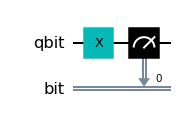

OPENQASM 2.0;
include "qelib1.inc";
qreg qbit[1];
creg bit[1];
x qbit[0];
measure qbit[0] -> bit[0];



In [7]:
import matplotlib.pyplot as plt
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram


############# CREATE #####################
qr = QuantumRegister(1, 'qbit')
cr = ClassicalRegister(1, 'bit')
qc = QuantumCircuit(qr, cr)

qc.x(0)
qc.measure(0, 0)

qc.draw(output='mpl')
plt.show()

print(qc.qasm())

# Run the code on a real quantum computer

Visit https://quantum-computing.ibm.com/account and get the key!

Visit https://quantum-computing.ibm.com/services?services=systems&systems=yours and choose a backend (1 bit is ok).

ibmqfactory.load_account:WARNING:2021-10-19 11:54:48,651: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


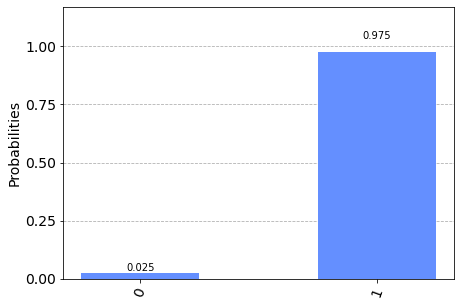

In [9]:
from qiskit import IBMQ, execute
# IBMQ.save_account(
#     '...'
# )
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qpu = provider.get_backend("ibmq_armonk")
job = execute(qc, backend=qpu, shots=40)

from qiskit.tools.monitor import job_monitor

job_monitor(job)
counts = job.result().get_counts()
plot_histogram(counts)
plt.show()